In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


df = pd.read_csv('2024_price_list.csv')

loaded_model_stacking = joblib.load('price_model_stacking.pkl')
loaded_model_stacking_cat = joblib.load('price_model_stacking_cat.pkl')
loaded_model_xgb = joblib.load('price_model_xgb.pkl')
loaded_model_rf = joblib.load('price_model_rf.pkl')

모델 파일을 불러옵니다.

In [31]:
df[df['Price'] <= 1000]

,Unnamed: 0,Gu,Dong,Name,Date,Price,Area,Floor,Address,Year,...,Distance to NS,Elementary Schools Num,High Schools Num,Market Num,Hospital Num,Park Presence,Nearby Hangang,Gu_encoding,Dong_encoding,Bus Station
3843,3843,구로구,구로동,신구로자이,20240228,800,84.94,14,구로구 구로동 0501-0000,2024,...,0.342962,3,0,12,8,1,0,7,190,10.5
3844,3844,구로구,구로동,신구로자이,20240228,700,84.94,14,구로구 구로동 0501-0000,2024,...,0.342962,3,0,12,8,1,0,7,191,10.5


이 두값은 명확히 이상치이므로 제거합니다.

In [33]:
df.drop([3843,3844], inplace=True)

In [34]:
X = df[['Longitude',
       'Latitude', 'major', 'Building Year', 'Floor', 'Interest Rate', 'Jeonse Index', 'Total Population',
       'Children', 'Youth', 'Old Age',
       'Consumption', 'Distance to MC', 'Distance to NS', 'Elementary Schools Num',
       'High Schools Num', 'Market Num', 'Hospital Num', 'Park Presence',
       'Nearby Hangang', 'Bus Station', 'Gu_encoding']]
y = df['Price']/df['Area']

2024년 파일엔 Price per Area가 없으니 이렇게 정의해줍시다.

아래에서 테스트셋에 대한 성능을 측정합니다.

In [35]:
pred_stacking = loaded_model_stacking.predict(X)

r2 = r2_score(y, pred_stacking)
n = X.shape[0]  # 테스트 샘플의 수
p = X.shape[1]  # 변수의 수
adjusted_r2 = 1 - (1-r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y, pred_stacking)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred_stacking)

# 성능 지표 출력
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Adjusted R^2: 0.9117
MSE: 40063.2939
RMSE: 200.1582
MAE: 132.9641


In [36]:
pred_stacking_cat = loaded_model_stacking_cat.predict(X)

r2 = r2_score(y, pred_stacking_cat)
n = X.shape[0]  # 테스트 샘플의 수
p = X.shape[1]  # 변수의 수
adjusted_r2 = 1 - (1-r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y, pred_stacking_cat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred_stacking_cat)

# 성능 지표 출력
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Adjusted R^2: 0.8973
MSE: 46624.6070
RMSE: 215.9273
MAE: 140.3461


In [37]:
pred_rf = loaded_model_rf.predict(X)

r2 = r2_score(y, pred_rf)
n = X.shape[0]  # 테스트 샘플의 수
p = X.shape[1]  # 변수의 수
adjusted_r2 = 1 - (1-r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y, pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred_rf)

# 성능 지표 출력
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Adjusted R^2: 0.8978
MSE: 46402.1078
RMSE: 215.4115
MAE: 139.2532


In [38]:
pred_xgb = loaded_model_xgb.predict(X)

r2 = r2_score(y, pred_xgb)
n = X.shape[0]  # 테스트 샘플의 수
p = X.shape[1]  # 변수의 수
adjusted_r2 = 1 - (1-r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y, pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred_xgb)

# 성능 지표 출력
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Adjusted R^2: 0.9121
MSE: 39897.3494
RMSE: 199.7432
MAE: 138.2351


In [ ]:
스태킹 모델이 성능은 가장 좋습니다.

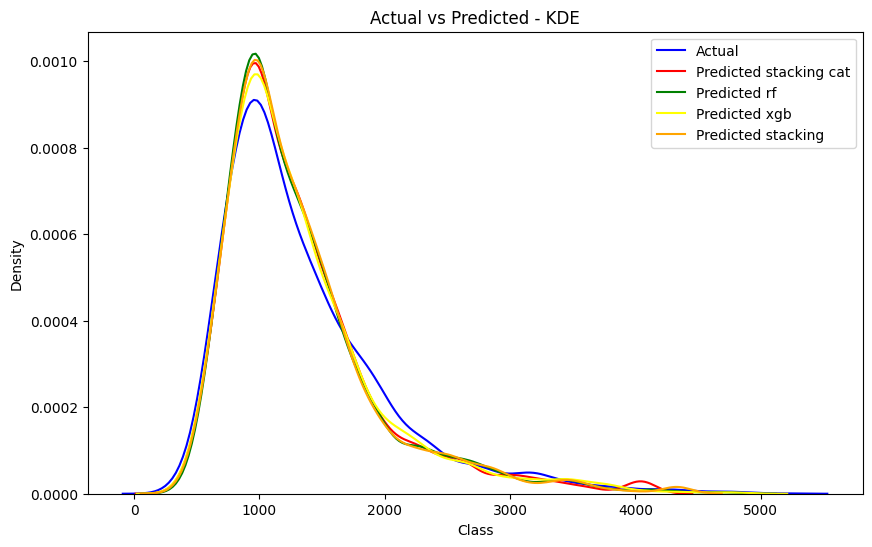

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y, label='Actual', color='blue')
sns.kdeplot(pred_stacking_cat, label='Predicted stacking cat', color='red')
sns.kdeplot(pred_rf, label='Predicted rf', color='green')
sns.kdeplot(pred_xgb, label='Predicted xgb', color='yellow')
sns.kdeplot(pred_stacking, label='Predicted stacking', color='orange')
plt.title('Actual vs Predicted - KDE')
plt.xlabel('Class')
plt.ylabel('Density')
plt.legend()
plt.show()

하지만 KDE그래프를 그려보니 XGB모델이 최빈치에서 가장 가까운 예측을 보여주는것을 볼 수 있습니다.

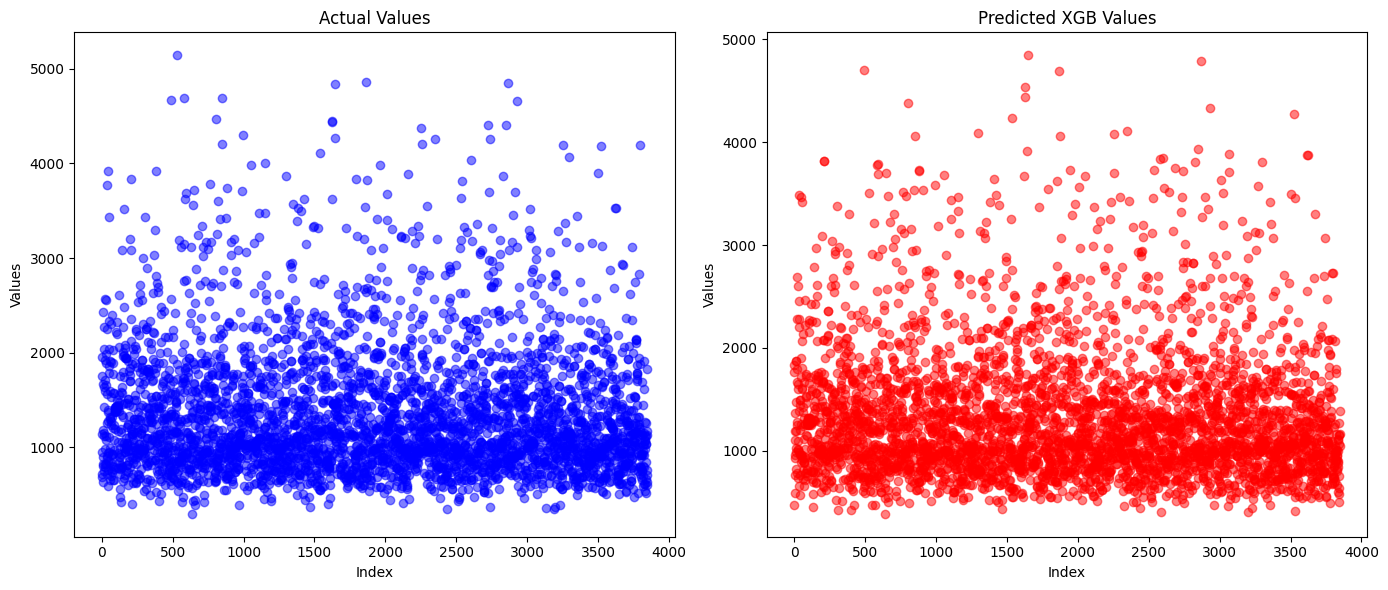

In [40]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
plt.scatter(range(len(y)), y, color='blue', alpha=0.5)
plt.title('Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')

plt.subplot(1, 2, 2) 
plt.scatter(range(len(pred_xgb)), pred_xgb, color='red', alpha=0.5)
plt.title('Predicted XGB Values')
plt.xlabel('Index')
plt.ylabel('Values')

plt.tight_layout()
plt.show()


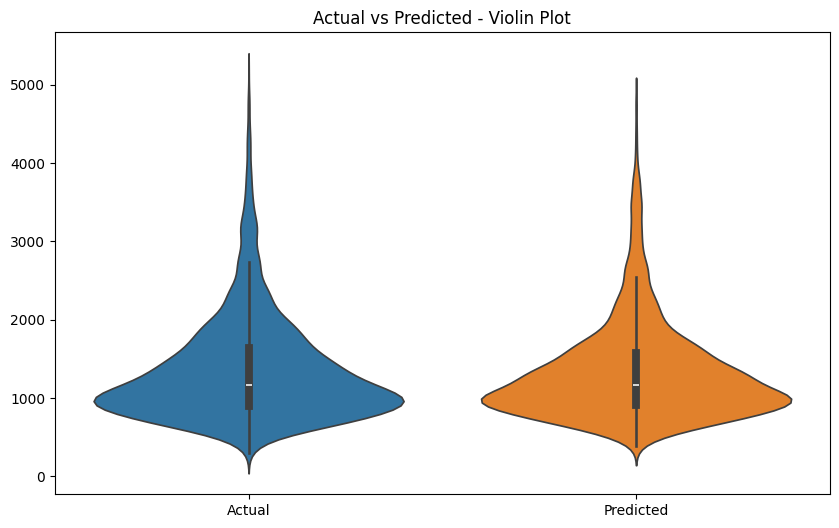

In [41]:
data = {'Actual': y, 'Predicted': pred_xgb}
df = pd.DataFrame(data)

# Violin Plot 생성
plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Actual vs Predicted - Violin Plot')
plt.show()